# Intorduction  Project Titanic Data Analysis :

>- The sinking of the Titanic is one of the most infamous shipwrecks in history.

>- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

>- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# Data Wrangling :

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Titanic_Data.csv') #load dataset anto a dataframe
df.head() #shows the first 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.shape

(891, 12)

In [11]:
df.describe()  #get statistical data about each column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


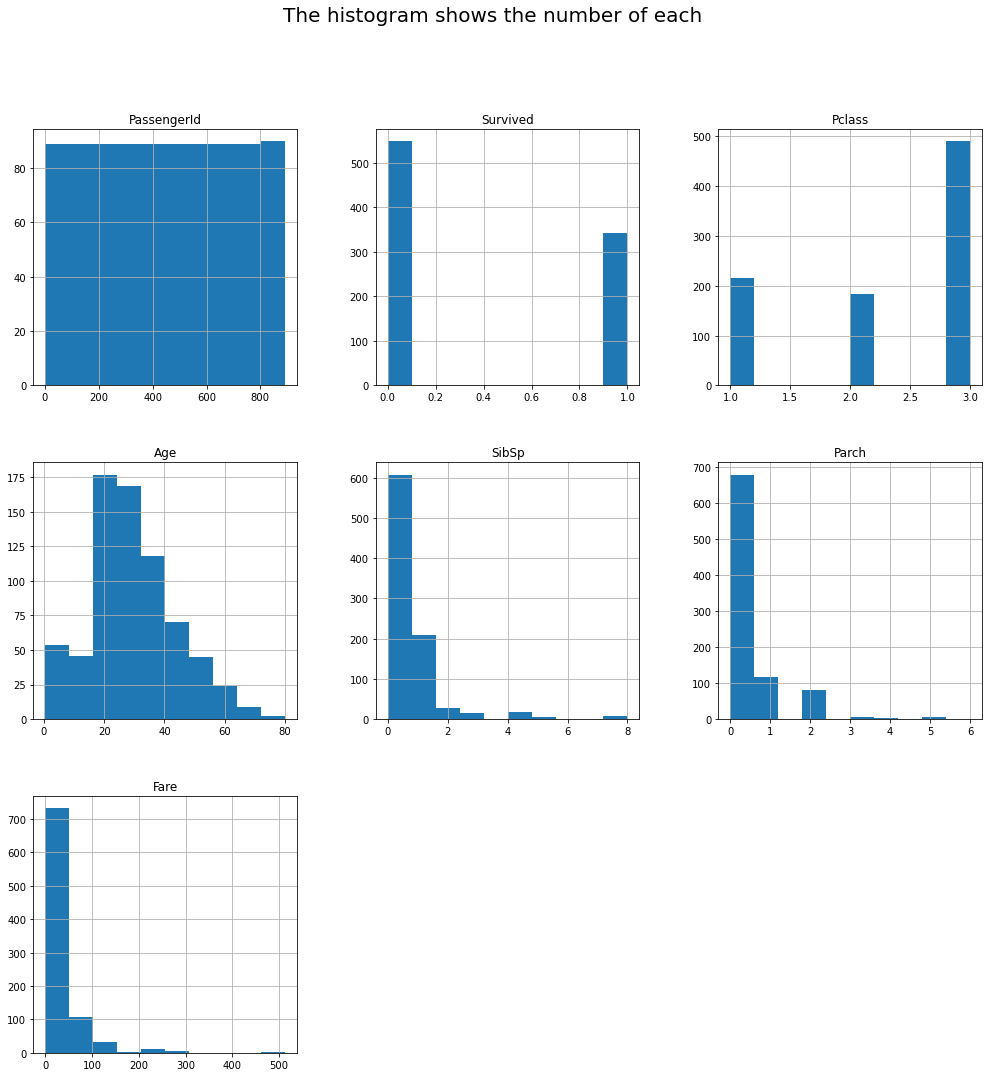

In [12]:
#draw Histogram to show distribution of data for each feature
df.hist(figsize=(17,17))
plt.suptitle('The histogram shows the number of each', fontsize=20);

>- We see that the percentage of people who survived is less than the people who did not
>- The rate of the 3rd ticket category is noticeably very high
>- We notice that young people are more present, the percentage decreases with increasing age on board the ship
>- It is clear in the drawing that the number of siblings / spouses on board the Titanic is small
>- It's clear in the drawing that the number of parents / children aboard the Titanic is small
>- Very surprised by the decline Fare  that the people on the ship did not pay Fare :D

# Data Cleaning :

In [13]:
#Fill in the blank values from the total average values of the table
df.fillna(df.mean(),inplace=True)

In [14]:
#Show values equal to "NaN" in the "Embarked" column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
#Clean the following columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
#Clean up rows containing "NaN" values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [17]:
#Change the following values to make it easier to read and understand
df['Embarked'].replace({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


In [18]:
#Change the age data type to integer numbers to make it easier to read
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


# Exploratory Data Anaysis :

## Question 1 :
>- What is the percentage of survivors from the ship?


In [19]:
Survived_True = df[df['Survived']==1]['Survived'].count()
Survived_False = df[df['Survived']==0]['Survived'].count()
print(Survived_True)
print(Survived_False)

340
549


Text(0.5, 1.3, "Percentage of Survivors of VS Didn't survive")

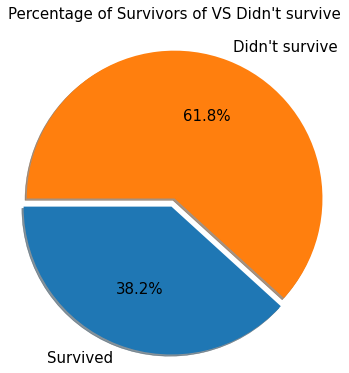

In [20]:
data = [Survived_True,Survived_False]
label = ['Survived',"Didn't survive"]
plt.axis('equal')
plt.style.use('fivethirtyeight')
plt.pie(data,labels=label,explode=[0.1,0],autopct='%1.1f%%',shadow=True,startangle=180,radius=1.7,textprops={'fontsize':15})
plt.title("Percentage of Survivors of VS Didn't survive",y=1.3,fontsize=15)

### Answer:
>- Unfortunately, the percentage of people who did not survive the ship is high, 61.8%


## Question 2 :

> - What is the percentage of ship survivors for each ticket class


Text(0, 0.5, '')

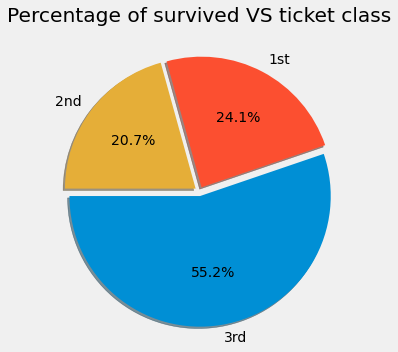

In [21]:
count_survived = df['Pclass'].value_counts()
count_survived.plot(kind='pie',labels=['3rd','1st','2nd'],autopct='%1.1f%%',explode=[0.05,0.05,0.05],shadow=True,startangle=180,
                   radius=1.4)
plt.title('Percentage of survived VS ticket class',y=1.2)
plt.ylabel(None)

### Answer:
>- We notice that the third category is the most existence ticket category on board the ship with a percentage 55.2%

## Question 3 :
>- What is the most surviving ticket class in terms of fare

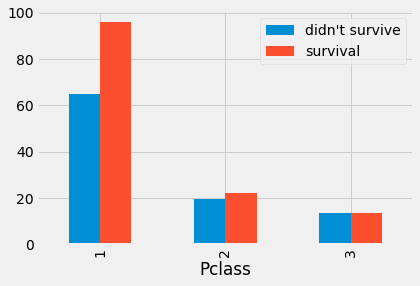

In [22]:
mean_pclass = df.groupby(['Pclass','Survived']).mean()

mean_pclass['Fare'].unstack().plot(kind='bar')
plt.legend(["didn't survive",'survival']) #Clarify the features of the drawing


### Answer:
>- Unfortunately, you will notice that the 1st category is the most got damaged due to the collision in the iceberg.
>- We notice see that the 2nd and 3rd class are equal in the proportion of people who survived and did not survive on board the ship.

## Question 4 :

>- What are the ages of the people on the ship
>>- We want to divide the ages of age to clarify :
>>- below 18, 18-24, 25-34, 35-44, 45-54, 55-64, more than 65.

In [23]:
def age (data,columns,l1,l2):
    
    """The state is responsible for dividing the ages in order to evaluate
    itsflag as the best form. The function takes 4 values:
    
    ======================================================
    input :
    ======================================================
    
    data : It takes the original value that will be divided by it
    rows : She takes the name of the column that will take a lifetime
    s1 : the lower limit of the column.
    s2 : the higher limit of the column
    
    ======================================================
    output :
    ======================================================
    
    a new dataframe with all columns in the original one but only the rows which meet the condition.

    """
    
    if l2 < l1 :
        l1 , l2 = l2 , l1
    
    return data.query(f'{l1} <= {columns} <= {l2}')

In [24]:
#get dataframes for each age category
childs = df.query('Age < 18')
age_18 = age(df,"Age",18,24)
age_25 = age(df,'Age',25,34)
age_35 = age(df,'Age',35,44)
age_45 = age(df,'Age',45,54)
age_55 = age(df,'Age',55,64)
old = df.query('Age >= 65')

In [25]:
#calculate mean for each age category
mean_childs = childs['Survived'].mean()
mean_age_18 = age_18['Survived'].mean()
mean_age_25 = age_25['Survived'].mean()
mean_age_35 = age_35['Survived'].mean()
mean_age_45 = age_45['Survived'].mean()
mean_age_55 = age_55['Survived'].mean()
mean_old = old['Survived'].mean()

Text(0, 0.5, 'Average Survival')

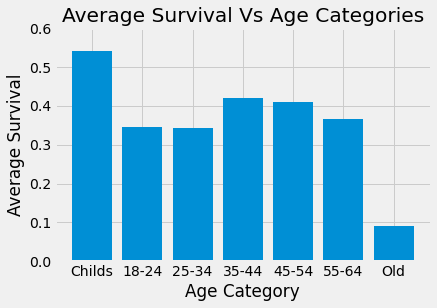

In [26]:
locations = [1,2,3,4,5,6,7]
heights = [mean_childs,mean_age_18,mean_age_25,mean_age_35,mean_age_45,mean_age_55,mean_old]
labels = ['Childs','18-24','25-34','35-44','45-54','55-64','Old']

plt.bar(locations,heights,tick_label = labels)
plt.title('Average Survival Vs Age Categories')
plt.ylim([0,0.6]) #to focus on this spot to feel the change
plt.xlabel('Age Category')
plt.ylabel('Average Survival')

### Answer:
>- Unfortunately, we will see that the percentage of people who exceed the age of 65, the survival rate is very small
>- We notice respond that people under 18 have a high survival rate of more than 50%
>- All ages are close to some, the percentage difference between them is 1%

## Question 5 :
>- What is the sex that survived the sinking of the ship?

Text(0, 0.5, 'number of people')

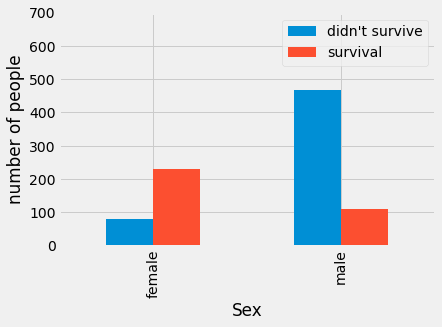

In [27]:
count_pclass=df.groupby(['Sex','Survived']).count()
count_pclass['Pclass'].unstack().plot(kind='bar')
plt.ylim([0,700]) #to focus on this spot to feel the change
plt.legend(["didn't survive",'survival']) #Clarify the features of the drawing
plt.ylabel('number of people')

### Answer:
>- Unfortunately, we see that males are the most vulnerable to damage in a very large proportion, and the people who survived 109 out of a total of 577 people
>- We notice that the female survival rate is much higher than the male survival rate

## Question 6 :
>- What percentage  of siblings / spouses are on the ship?

Text(0, 0.5, 'number of people')

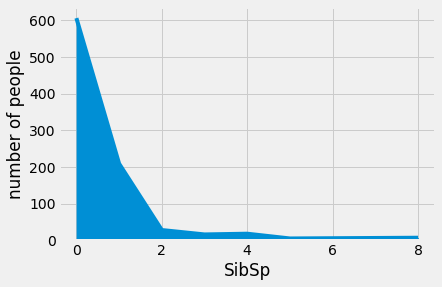

In [28]:
count_SibSp = df.groupby(['SibSp'])['Survived'].count()
count_SibSp.plot(kind='area')
plt.ylabel('number of people')

### Answer:
>- We notice see that the largest percentage is the absence of siblings / spouses, there is a small percentage ranging from (2,4) with an act that came to the ship

# Question 7 :
>- What percentage  of parents / children are on the ship?

Text(0, 0.5, 'number of people')

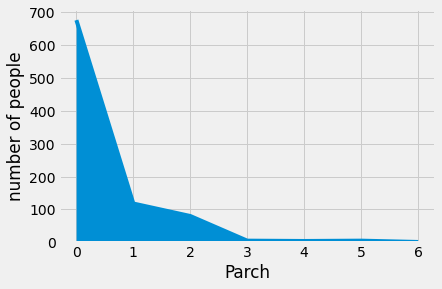

In [29]:
count_Parch = df.groupby(['Parch'])['Survived'].count()
count_Parch.plot(kind='area')
plt.ylabel('number of people')

### Answer:
>- We will see that the largest percentage is the absence of parents / children, there is a small percentage ranging from (1,3) with an act that came to the ship

## Question 8 :
>- What is the most Survived departure port

Text(0, 0.5, 'number of people')

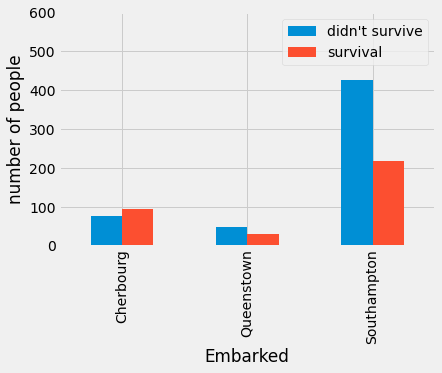

In [30]:
count_Embarked = df.groupby(['Embarked','Survived']).count()
count_Embarked['Fare'].unstack().plot(kind='bar')
plt.ylim([0,600]) #to focus on this spot to feel the change
plt.legend(["didn't survive",'survival']) #Clarify the features of the drawing
plt.ylabel('number of people')

### Answer:
>- We notice that the port of Southampton is the most frequented port for people
>- We notice that the port of Southampton has loss of life from this port and people who did not survive Double the number
 People who survived